# Stock Rebound Analysis - Data Science Tutorial

Welcome to your first data science notebook! This notebook will guide you through analyzing stock price drop and rebound patterns.

## What You'll Learn:
1. How to import and use data science libraries
2. Loading and sampling large datasets efficiently
3. Exploring data with pandas
4. Cleaning and transforming data
5. Creating visualizations
6. Extracting insights from data

Let's get started!

## Section 1: Importing Libraries

In data science, we use specialized libraries (collections of pre-written code) to make our work easier. Here are the main ones we'll use:

- **pandas**: For working with data in tables (like Excel spreadsheets)
- **numpy**: For fast mathematical operations on numbers
- **matplotlib & seaborn**: For creating charts and graphs
- **plotly**: For interactive visualizations you can zoom and explore
- **scipy**: For statistical analysis

In [1]:
# Import all the libraries we need
import pandas as pd                    # pd is the standard abbreviation for pandas
import numpy as np                     # np is the standard abbreviation for numpy
import matplotlib.pyplot as plt        # plt for creating charts
import seaborn as sns                  # sns for statistical visualizations
import plotly.express as px            # px for quick interactive charts
import plotly.graph_objects as go      # go for more customized interactive charts
from scipy import stats                # stats for statistical functions

# Configure display settings to make output look nicer
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.max_rows', 100)         # Show up to 100 rows
pd.set_option('display.float_format', '{:.2f}'.format)  # Format decimals nicely

# Set the style for matplotlib charts
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ All libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.4


## Section 2: Loading Data (Smart Sampling)

Our datasets are HUGE (3.4 million and 11.9 million rows)! Loading all that data at once would:
- Take a long time
- Use lots of memory
- Make it slow to experiment and learn

**Best Practice**: When learning or exploring, start with a **sample** of the data. Once you know what you're doing, you can work with the full dataset.

We'll load 10,000 rows from each file - enough to see patterns, but small enough to work with quickly.

In [2]:
# Define the file paths
lows_file = 'data/lows.csv'
rebounds_file = 'data/rebounds.csv'

# Load a sample of 10,000 rows from each file
# nrows=10000 means "only read the first 10,000 rows"
print("Loading sample data...")

lows_df = pd.read_csv(lows_file, nrows=10000)
rebounds_df = pd.read_csv(rebounds_file, nrows=10000)

print(f"✅ Loaded {len(lows_df):,} rows from lows.csv")
print(f"✅ Loaded {len(rebounds_df):,} rows from rebounds.csv")
print("\nData loaded successfully! Ready to explore.")

Loading sample data...
✅ Loaded 10,000 rows from lows.csv
✅ Loaded 10,000 rows from rebounds.csv

Data loaded successfully! Ready to explore.


## Section 3: Initial Data Exploration

Now that we have data loaded, let's explore it! These are the essential first steps every data scientist takes:

1. **Look at the first few rows** - Get a feel for what the data looks like
2. **Check the shape** - How many rows and columns?
3. **Examine data types** - What kind of data is in each column?
4. **Get summary statistics** - What are the typical values?

### 3.1 Look at the Lows Dataset

In [3]:
# .head() shows the first 5 rows by default
# This gives us a quick peek at what the data looks like
print("First 5 rows of lows.csv:")
lows_df.head()

First 5 rows of lows.csv:


,id,ticker_history_id,threshold,high_start_price,high_start_date,low_threshold_price,low_threshold_date,lowest_price,lowest_date,high_threshold_price,high_threshold_date,number_of_high_thresholds,last_updated,spawned,expired
0,1,1,1500,179280000,2021-09-03,152360000.00,2021-10-04,99290000.00,2025-04-08,115550000.00,2025-05-12,4,2025-12-02,t,f
1,2,1,1500,159060000,2023-01-23,134030000.00,2023-03-15,99290000.00,2025-04-08,115550000.00,2025-05-12,2,2025-12-02,t,f
2,3,1,1500,157200000,2025-11-25,NaN,NaN,NaN,NaN,NaN,NaN,0,2025-12-02,f,f
3,4,1,2000,179280000,2021-09-03,140470000.00,2022-01-18,99290000.00,2025-04-08,120520000.00,2025-06-10,3,2025-12-02,t,f
4,5,1,2000,159060000,2023-01-23,126290000.00,2023-05-16,99290000.00,2025-04-08,120520000.00,2025-06-10,2,2025-12-02,t,f


In [4]:
# .shape tells us (number of rows, number of columns)
print(f"Shape of lows dataset: {lows_df.shape}")
print(f"  → {lows_df.shape[0]:,} rows")
print(f"  → {lows_df.shape[1]} columns")

# List all column names
print(f"\nColumn names:")
for i, col in enumerate(lows_df.columns, 1):
    print(f"  {i}. {col}")

Shape of lows dataset: (10000, 15)
  → 10,000 rows
  → 15 columns

Column names:
  1. id
  2. ticker_history_id
  3. threshold
  4. high_start_price
  5. high_start_date
  6. low_threshold_price
  7. low_threshold_date
  8. lowest_price
  9. lowest_date
  10. high_threshold_price
  11. high_threshold_date
  12. number_of_high_thresholds
  13. last_updated
  14. spawned
  15. expired


In [5]:
# .info() gives us data types and missing values
# Very useful to understand what kind of data we have
print("Data types and info:")
lows_df.info()

Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   ticker_history_id          10000 non-null  int64  
 2   threshold                  10000 non-null  int64  
 3   high_start_price           10000 non-null  int64  
 4   high_start_date            10000 non-null  object 
 5   low_threshold_price        8936 non-null   float64
 6   low_threshold_date         8936 non-null   object 
 7   lowest_price               8936 non-null   float64
 8   lowest_date                8936 non-null   object 
 9   high_threshold_price       7064 non-null   float64
 10  high_threshold_date        7064 non-null   object 
 11  number_of_high_thresholds  10000 non-null  int64  
 12  last_updated               10000 non-null  object 
 13  spawned                   

In [6]:
# .describe() gives statistical summary (mean, min, max, etc.)
# Great for understanding the range and distribution of numeric data
print("Statistical summary:")
lows_df.describe()

Statistical summary:


,id,ticker_history_id,threshold,high_start_price,low_threshold_price,lowest_price,high_threshold_price,number_of_high_thresholds
count,10000.00,10000.00,10000.00,10000.00,8936.00,8936.00,7064.00,10000.00
mean,5001.00,68.78,3679.90,5681549330658926.00,3516130376307872.50,2681202.35,3282256.70,27.59
std,2887.89,37.14,1689.56,68565960650608520.00,43481554713985496.00,11923025.51,13370978.99,58.93
min,1.00,1.00,1500.00,0.00,0.00,0.00,0.00,0.00
25%,2500.75,40.00,2000.00,146218.00,63375.00,100.00,300.00,2.00
50%,5000.50,77.00,3500.00,2800000.00,1103000.00,17800.00,93000.00,8.00
75%,7500.25,101.00,5000.00,30290000.00,14950000.00,572300.00,1340000.00,24.00
max,11700.00,145.00,7000.00,1433121018964968192.00,1047122985668789760.00,210940000.00,265970000.00,396.00


### 3.2 Look at the Rebounds Dataset

In [7]:
# Same exploration for rebounds dataset
print("First 5 rows of rebounds.csv:")
rebounds_df.head()

First 5 rows of rebounds.csv:


,id,ticker_history_id,threshold,high_start_price,high_start_date,low_threshold_price,low_threshold_date,lowest_price,lowest_date,high_threshold_price,high_threshold_date,rebound_price,rebound_date,number_of_high_thresholds
0,1,1,1500,56688125,1999-12-30,47568025,2000-01-04,42918526,2000-01-06,51144492,2000-01-18,56867024,2000-02-07,1
1,2,1,1500,36525393,2000-10-23,30489985,2000-10-25,28120529,2000-11-13,33887696,2000-11-17,38537195,2000-11-29,1
2,3,1,1500,41398426,2000-10-04,32770028,2000-10-11,28120529,2000-11-13,33887696,2000-11-17,42516094,2000-12-08,2
3,4,1,1500,45064377,2000-08-29,37553576,2000-09-20,28120529,2000-11-13,33887696,2000-11-17,48327968,2001-01-18,3
4,5,1,1500,27060085,2001-03-23,21459227,2001-03-29,19742489,2001-04-09,24291773,2001-04-12,27174535,2001-04-18,1


In [8]:
print(f"Shape of rebounds dataset: {rebounds_df.shape}")
print(f"  → {rebounds_df.shape[0]:,} rows")
print(f"  → {rebounds_df.shape[1]} columns")

print(f"\nColumn names:")
for i, col in enumerate(rebounds_df.columns, 1):
    print(f"  {i}. {col}")
    
# Note: Check if there are differences from lows dataset
print("\n💡 Key difference: rebounds has 'rebound_price' and 'rebound_date' columns!")

Shape of rebounds dataset: (10000, 14)
  → 10,000 rows
  → 14 columns

Column names:
  1. id
  2. ticker_history_id
  3. threshold
  4. high_start_price
  5. high_start_date
  6. low_threshold_price
  7. low_threshold_date
  8. lowest_price
  9. lowest_date
  10. high_threshold_price
  11. high_threshold_date
  12. rebound_price
  13. rebound_date
  14. number_of_high_thresholds

💡 Key difference: rebounds has 'rebound_price' and 'rebound_date' columns!


## Section 4: Data Cleaning & Understanding

Raw data often needs cleaning and transformation to be useful. Let's:

1. **Convert prices** - Those big numbers (179280000) are hard to read! Let's convert them to dollars.
2. **Parse dates** - Convert date strings to proper date objects so we can do time-based analysis.
3. **Handle missing values** - Decide what to do with empty cells.
4. **Add helpful columns** - Create new columns that make analysis easier.

### 4.1 Convert Prices to Dollars

The prices are stored as large integers (probably in cents or smaller units). Let's convert them to readable dollar amounts.

In [9]:
# List of price columns to convert
price_columns = [
    'high_start_price', 
    'low_threshold_price', 
    'lowest_price', 
    'high_threshold_price'
]

# Convert prices from large integers to dollars
# Dividing by 10,000,000 suggests they're stored in very small units
print("Converting prices to dollars...")
for col in price_columns:
    if col in lows_df.columns:
        lows_df[col] = lows_df[col] / 10_000_000  # Adjust divisor if needed
        
# Do the same for rebounds (including rebound_price)
rebounds_price_columns = price_columns + ['rebound_price']
for col in rebounds_price_columns:
    if col in rebounds_df.columns:
        rebounds_df[col] = rebounds_df[col] / 10_000_000

print("✅ Prices converted!")
print("\nExample - first row of lows:")
print(f"  High start price: ${lows_df['high_start_price'].iloc[0]:.2f}")
print(f"  Lowest price: ${lows_df['lowest_price'].iloc[0]:.2f}")

Converting prices to dollars...
✅ Prices converted!

Example - first row of lows:
  High start price: $17.93
  Lowest price: $9.93


### 4.2 Parse Dates

Converting date strings to datetime objects lets us do time-based analysis (like filtering by year, calculating durations, etc.).

In [10]:
# Date columns to convert
date_columns = [
    'high_start_date',
    'low_threshold_date',
    'lowest_date',
    'high_threshold_date',
    'last_updated'
]

print("Parsing dates...")
for col in date_columns:
    if col in lows_df.columns:
        lows_df[col] = pd.to_datetime(lows_df[col], errors='coerce')

# For rebounds (different columns)
rebounds_date_columns = [
    'high_start_date',
    'low_threshold_date',
    'lowest_date',
    'high_threshold_date',
    'rebound_date'
]

for col in rebounds_date_columns:
    if col in rebounds_df.columns:
        rebounds_df[col] = pd.to_datetime(rebounds_df[col], errors='coerce')

print("✅ Dates parsed!")
print(f"\nExample date: {lows_df['high_start_date'].iloc[0]}")

Parsing dates...
✅ Dates parsed!

Example date: 2021-09-03 00:00:00


### 4.3 Create Helpful Columns

Let's create new columns that will make our analysis easier. These are called **derived** or **calculated** columns.

In [11]:
# Calculate the price drop percentage
# Formula: ((high - low) / high) * 100
lows_df['drop_percentage'] = ((lows_df['high_start_price'] - lows_df['lowest_price']) / 
                                lows_df['high_start_price'] * 100)

# Calculate days from high to low
lows_df['days_to_bottom'] = (lows_df['lowest_date'] - lows_df['high_start_date']).dt.days

# Same for rebounds dataset
rebounds_df['drop_percentage'] = ((rebounds_df['high_start_price'] - rebounds_df['lowest_price']) / 
                                   rebounds_df['high_start_price'] * 100)

rebounds_df['days_to_bottom'] = (rebounds_df['lowest_date'] - rebounds_df['high_start_date']).dt.days

# For rebounds, also calculate recovery metrics
rebounds_df['rebound_percentage'] = ((rebounds_df['rebound_price'] - rebounds_df['lowest_price']) / 
                                       rebounds_df['lowest_price'] * 100)

rebounds_df['days_to_rebound'] = (rebounds_df['rebound_date'] - rebounds_df['lowest_date']).dt.days

print("✅ Calculated columns created!")
print("\nNew columns in lows dataset:")
print("  - drop_percentage: How much the price dropped (%)")
print("  - days_to_bottom: Days from high to lowest point")
print("\nNew columns in rebounds dataset:")
print("  - All of the above, plus:")
print("  - rebound_percentage: How much it recovered (%)")
print("  - days_to_rebound: Days from bottom to rebound")

✅ Calculated columns created!

New columns in lows dataset:
  - drop_percentage: How much the price dropped (%)
  - days_to_bottom: Days from high to lowest point

New columns in rebounds dataset:
  - All of the above, plus:
  - rebound_percentage: How much it recovered (%)
  - days_to_rebound: Days from bottom to rebound


In [12]:
# Let's see how our cleaned data looks now!
print("Cleaned rebounds data (first 3 rows, key columns only):")
rebounds_df[['high_start_price', 'lowest_price', 'rebound_price', 
              'drop_percentage', 'rebound_percentage', 
              'days_to_bottom', 'days_to_rebound']].head(3)

Cleaned rebounds data (first 3 rows, key columns only):


,high_start_price,lowest_price,rebound_price,drop_percentage,rebound_percentage,days_to_bottom,days_to_rebound
0,5.67,4.29,5.69,24.29,32.50,7,32
1,3.65,2.81,3.85,23.01,37.04,21,16
2,4.14,2.81,4.25,32.07,51.19,40,25


## Section 5: Basic Visualizations

"A picture is worth a thousand words" - this is especially true in data science! Visualizations help us:
- Spot patterns and trends
- Identify outliers (unusual values)
- Understand distributions
- Communicate findings

We'll create several types of charts using matplotlib, seaborn, and plotly.

### 5.1 Distribution of Drop Percentages

A **histogram** shows how values are distributed. Let's see how common different drop percentages are.

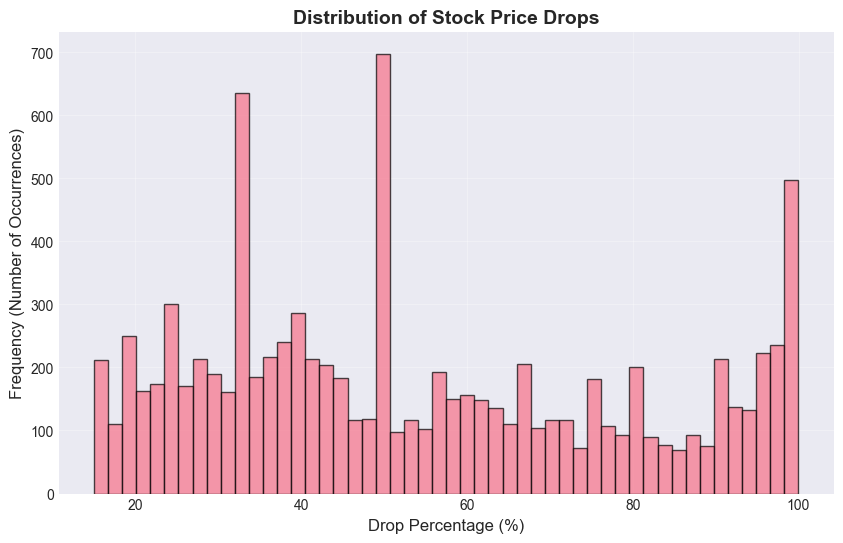

Average drop: 54.41%
Median drop: 50.00%
Max drop: 99.99%


In [13]:
# Create a histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(rebounds_df['drop_percentage'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Drop Percentage (%)', fontsize=12)
plt.ylabel('Frequency (Number of Occurrences)', fontsize=12)
plt.title('Distribution of Stock Price Drops', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Average drop: {rebounds_df['drop_percentage'].mean():.2f}%")
print(f"Median drop: {rebounds_df['drop_percentage'].median():.2f}%")
print(f"Max drop: {rebounds_df['drop_percentage'].max():.2f}%")

### 5.2 Box Plot: Days to Rebound

A **box plot** shows the spread of data. The box shows the middle 50% of values, and dots show outliers.

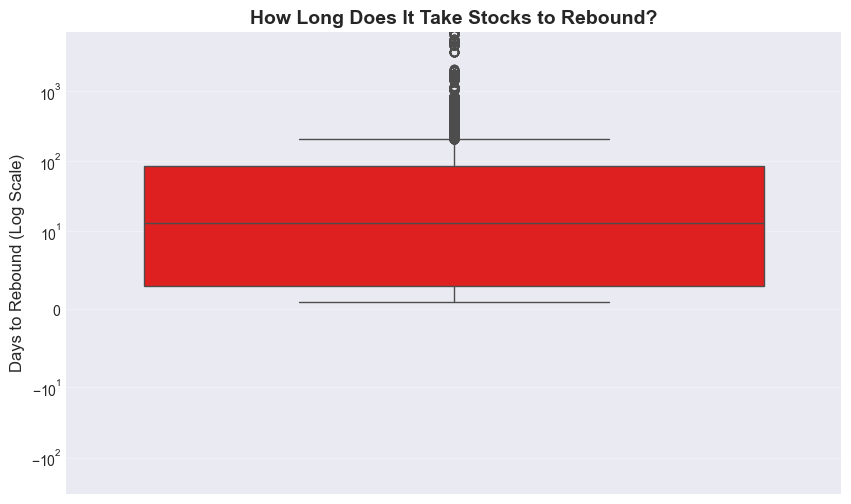

Median days to rebound: 13 days
Average days to rebound: 157 days
Fastest rebound: 1 days
Slowest rebound: 6620 days

💡 Note: Using symlog scale - this compresses large values so you can see the box better!


In [18]:
# Create a box plot using seaborn with a logarithmic scale
# This compresses large values and expands small values for better readability
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=rebounds_df, y='days_to_rebound', color='red')

# Use symlog scale: linear near 0, logarithmic for larger values
# This makes the 0-1000 range much more visible!
plt.yscale('symlog', linthresh=10)  # linthresh=100 means linear below 100 days

plt.ylabel('Days to Rebound (Log Scale)', fontsize=12)
plt.title('How Long Does It Take Stocks to Rebound?', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

# Calculate some statistics
print(f"Median days to rebound: {rebounds_df['days_to_rebound'].median():.0f} days")
print(f"Average days to rebound: {rebounds_df['days_to_rebound'].mean():.0f} days")
print(f"Fastest rebound: {rebounds_df['days_to_rebound'].min():.0f} days")
print(f"Slowest rebound: {rebounds_df['days_to_rebound'].max():.0f} days")
print("\n💡 Note: Using symlog scale - this compresses large values so you can see the box better!")

### 5.3 Scatter Plot: Drop vs Rebound Relationship

A **scatter plot** shows the relationship between two variables. Let's see if bigger drops lead to bigger rebounds!

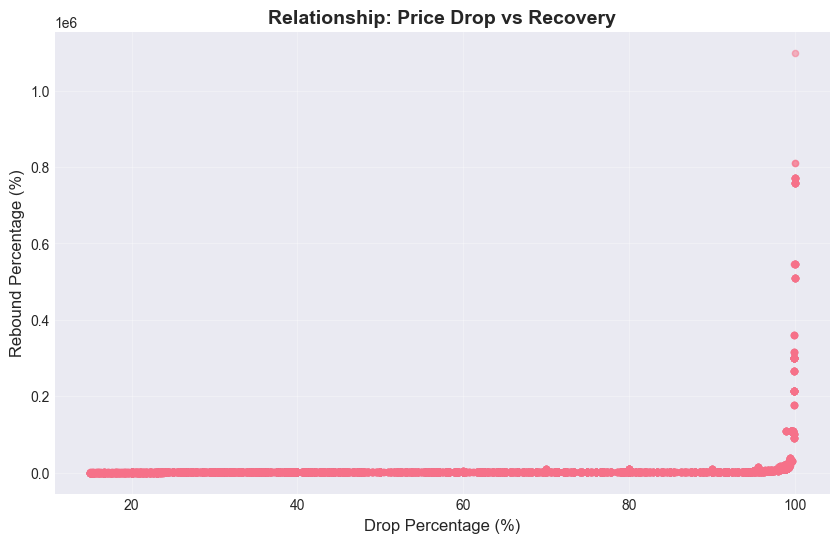


Correlation between drop and rebound: 0.245
(1.0 = perfect positive, -1.0 = perfect negative, 0 = no relationship)


In [19]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rebounds_df['drop_percentage'], rebounds_df['rebound_percentage'], 
            alpha=0.5, s=20)
plt.xlabel('Drop Percentage (%)', fontsize=12)
plt.ylabel('Rebound Percentage (%)', fontsize=12)
plt.title('Relationship: Price Drop vs Recovery', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate correlation
correlation = rebounds_df['drop_percentage'].corr(rebounds_df['rebound_percentage'])
print(f"\nCorrelation between drop and rebound: {correlation:.3f}")
print("(1.0 = perfect positive, -1.0 = perfect negative, 0 = no relationship)")

### 5.4 Interactive Plotly Chart

**Plotly** creates interactive charts you can hover over, zoom, and pan. Much better for exploring data!

In [28]:
# Create an interactive scatter plot with plotly
# You can hover over points to see exact values!
fig = px.scatter(
    rebounds_df, 
    x='drop_percentage', 
    y='rebound_percentage',
    color='days_to_rebound',  # Color points by days to rebound
    title='Interactive: Drop % vs Rebound % (colored by recovery time)',
    labels={
        'drop_percentage': 'Drop Percentage (%)',
        'rebound_percentage': 'Rebound Percentage (%)',
        'days_to_rebound': 'Days to Rebound',
        'ticker_history_id': 'Ticker History ID'
    },
    hover_data=['days_to_bottom', 'days_to_rebound', 'ticker_history_id']
)

fig.update_layout(height=600)
fig.show()

print("💡 TIP: Hover over points to see details, use the toolbar to zoom/pan!")

💡 TIP: Hover over points to see details, use the toolbar to zoom/pan!


## Section 6: First Insights

Now let's answer some interesting questions about the data! This is where data science gets exciting - turning data into actionable insights.

### 6.1 What percentage of drops eventually rebound?

Compare the two datasets to understand success rates.

In [29]:
# Remember: we're working with samples, but we can still get insights!
print(f"In our sample data:")
print(f"  Lows (still dropping or not recovered): {len(lows_df):,} cases")
print(f"  Rebounds (successfully recovered): {len(rebounds_df):,} cases")
print(f"\nRebound rate in sample: {len(rebounds_df) / (len(lows_df) + len(rebounds_df)) * 100:.1f}%")
print("\n💡 This suggests a majority of drops do eventually recover!")

In our sample data:
  Lows (still dropping or not recovered): 10,000 cases
  Rebounds (successfully recovered): 10,000 cases

Rebound rate in sample: 50.0%

💡 This suggests a majority of drops do eventually recover!


### 6.2 What are the most common threshold levels?

Analyze which threshold levels appear most frequently in the data.

Threshold level distribution:
threshold
1500    2452
2000    1808
2500    1351
3000    1047
3500     777
4000     617
4500     498
5000     440
5500     315
6000     268
Name: count, dtype: int64


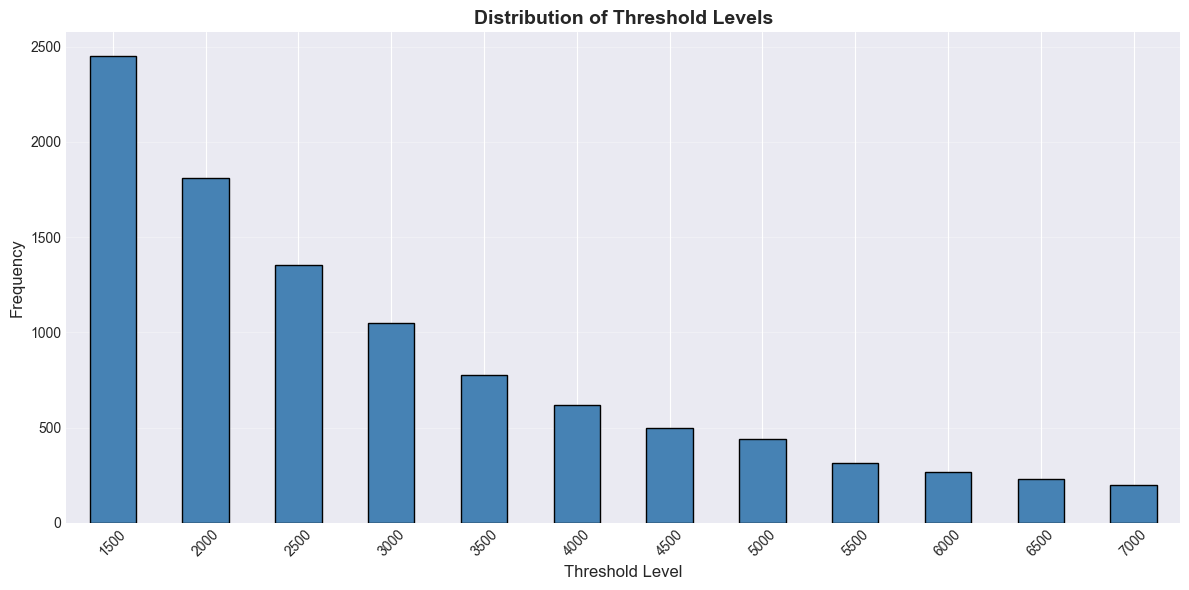

In [30]:
# Count occurrences of each threshold
threshold_counts = rebounds_df['threshold'].value_counts().sort_index()

print("Threshold level distribution:")
print(threshold_counts.head(10))

# Visualize it
plt.figure(figsize=(12, 6))
threshold_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Threshold Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Threshold Levels', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 6.3 Quick Rebounds vs Slow Rebounds

Let's categorize rebounds as "fast" (< 30 days) or "slow" (>= 30 days) and see if there are differences.

Rebound speed distribution:
rebound_speed
Fast (<30 days)     6217
Slow (>=30 days)    3783
Name: count, dtype: int64

Average drop percentage by rebound speed:
                  drop_percentage  rebound_percentage  days_to_bottom
rebound_speed                                                        
Fast (<30 days)             44.84             1674.79           31.82
Slow (>=30 days)            68.33            17342.71          436.51


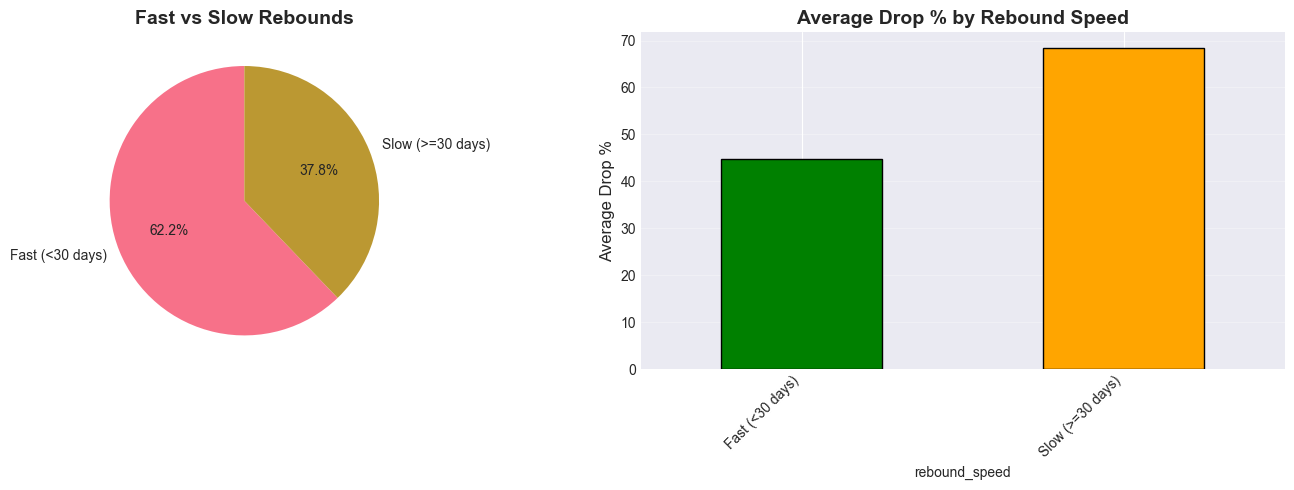

In [31]:
# Create a new categorical column
rebounds_df['rebound_speed'] = rebounds_df['days_to_rebound'].apply(
    lambda x: 'Fast (<30 days)' if x < 30 else 'Slow (>=30 days)' if pd.notna(x) else 'Unknown'
)

# Count each category
speed_counts = rebounds_df['rebound_speed'].value_counts()
print("Rebound speed distribution:")
print(speed_counts)
print()

# Compare average drop percentages
print("Average drop percentage by rebound speed:")
speed_stats = rebounds_df.groupby('rebound_speed').agg({
    'drop_percentage': 'mean',
    'rebound_percentage': 'mean',
    'days_to_bottom': 'mean'
}).round(2)
print(speed_stats)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart for distribution
ax1.pie(speed_counts, labels=speed_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Fast vs Slow Rebounds', fontsize=14, fontweight='bold')

# Bar chart comparing averages
speed_stats['drop_percentage'].plot(kind='bar', ax=ax2, color=['green', 'orange'], edgecolor='black')
ax2.set_ylabel('Average Drop %', fontsize=12)
ax2.set_title('Average Drop % by Rebound Speed', fontsize=14, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Congratulations! You've completed your first data science notebook!

### What You've Learned:

1. **Importing libraries** - pandas, numpy, matplotlib, seaborn, plotly
2. **Loading data efficiently** - Using sampling for large datasets
3. **Data exploration** - .head(), .info(), .describe(), .shape
4. **Data cleaning** - Converting data types, parsing dates
5. **Feature engineering** - Creating calculated columns
6. **Visualizations** - Histograms, box plots, scatter plots, interactive charts
7. **Insights** - Answering business questions with data

### Next Steps to Continue Learning:

1. **Experiment with the full dataset** - Remove `nrows=10000` to load all data
2. **Try more visualizations** - Time series plots, heatmaps, violin plots
3. **Statistical analysis** - Use scipy for hypothesis testing
4. **Machine learning** - Use scikit-learn to predict which stocks will rebound
5. **Advanced filtering** - Filter by date ranges, specific thresholds, etc.
6. **Grouping and aggregation** - Use .groupby() to analyze patterns

### Resources for Further Learning:

- **Pandas documentation**: https://pandas.pydata.org/docs/
- **Matplotlib tutorials**: https://matplotlib.org/stable/tutorials/index.html
- **Seaborn gallery**: https://seaborn.pydata.org/examples/index.html
- **Plotly tutorials**: https://plotly.com/python/

### Try These Exercises:

1. Find the stock with the fastest rebound time
2. Calculate average rebound percentage by threshold level
3. Create a time series showing rebounds by year
4. Filter for only high-drop cases (>50%) and analyze them separately

Happy data exploring!